In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("learning1_data.csv")

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,fault_type
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.071124,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,1
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,-0.246382,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,1
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,-0.197872,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,1
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.855152,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,1
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.257708,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.276886,-0.192730,0.108058,0.079642,-0.311127,-0.221611,-0.147273,-0.174633,-0.365725,-0.381783,...,-0.094367,-0.133169,0.044955,0.302521,0.241121,0.043294,0.003460,-0.033871,-0.104319,0
476,-0.115004,-0.141876,0.156770,0.342263,0.160012,0.018401,-0.048714,-0.215187,-0.239910,0.001983,...,0.398198,0.442239,0.557199,0.383141,0.367553,0.106910,-0.074565,0.101684,-0.073845,0
477,-0.240392,0.229288,0.115306,0.262058,0.342050,0.156611,-0.036038,-0.343879,-0.400363,-0.409394,...,0.057502,0.128183,0.287794,0.170361,0.267327,0.142104,-0.110235,-0.285532,-0.255486,0
478,-0.006846,0.094778,0.120428,0.285535,0.280125,0.027175,-0.165798,-0.301975,-0.359229,-0.233261,...,-0.683152,-0.270689,0.155243,0.085986,0.005096,-0.103922,-0.115395,0.294986,0.056098,0


In [4]:
first_row = data.iloc[0, :-1].values

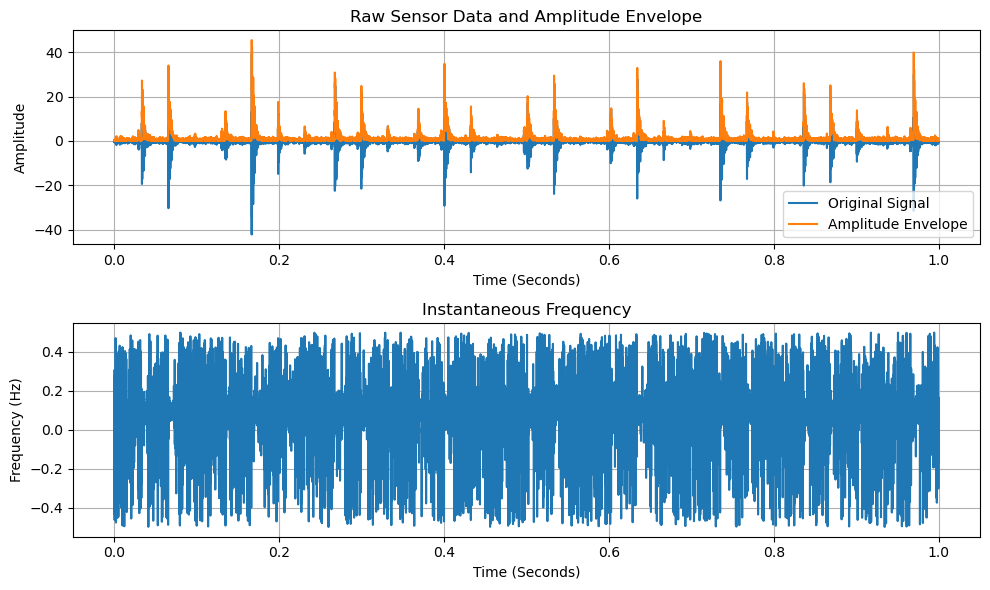

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# first_row: 이미 존재하는 데이터, 여기에 실제 데이터를 넣어야 함
# first_row = your data here

# 샘플링 주파수 (Hz)
fs = 25600  # 예: 1000 Hz로 가정

# Hilbert Transform 적용
analytic_signal = hilbert(first_row)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi)

# x축을 Hz로 변환하기 위해 시간 축 생성
time_points = np.arange(len(first_row)) / fs  # 시간축 생성

# 즉시 주파수를 위해 샘플 수 맞춤 (diff 때문에 한 개 적음)
time_points_freq = time_points[:-1]

# 힐버트 변환 후 결과 시각화
plt.figure(figsize=(10, 6))

# 원래 신호와 amplitude plot
plt.subplot(2, 1, 1)
plt.plot(time_points, first_row, label='Original Signal')
plt.plot(time_points, amplitude_envelope, label='Amplitude Envelope')
plt.title('Raw Sensor Data and Amplitude Envelope')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 즉시 주파수 plot
plt.subplot(2, 1, 2)
plt.plot(time_points_freq, instantaneous_frequency)
plt.title('Instantaneous Frequency')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()


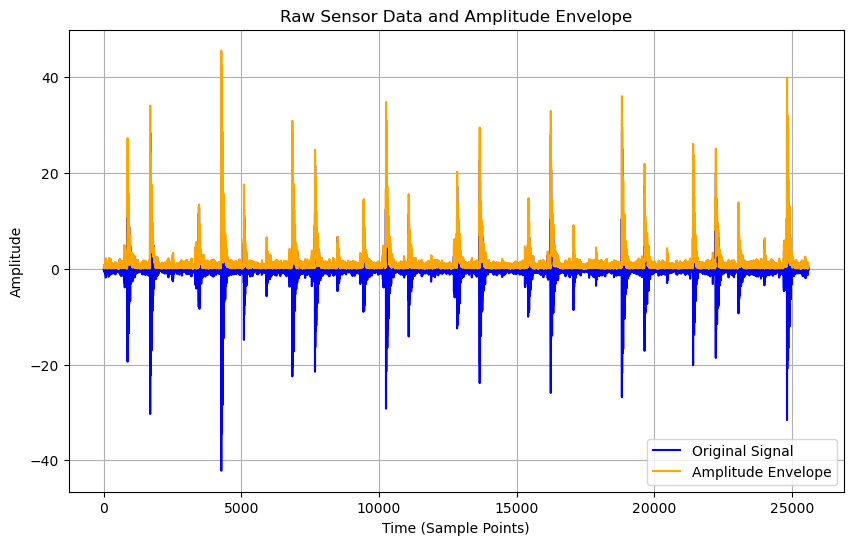

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# first_row: 이미 존재하는 데이터, 여기서는 가정된 값으로 작업
# first_row = your data here

# Hilbert Transform 적용하여 envelope 계산
analytic_signal = hilbert(first_row)  # 힐버트 변환
amplitude_envelope = np.abs(analytic_signal)  # envelope 구하기

# 원본 신호 및 envelope 시각화
plt.figure(figsize=(10, 6))

# 원래 신호 plot
plt.plot(first_row, label='Original Signal', color='blue')

# Envelope plot
plt.plot(amplitude_envelope, label='Amplitude Envelope', color='orange')

# 그래프 설정
plt.title('Raw Sensor Data and Amplitude Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("learning1_data.csv")

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,fault_type
0,-0.202268,-0.353959,-0.119095,0.247844,0.120783,-0.263038,-0.537206,-0.576838,-0.453532,-0.279206,...,0.071124,0.173103,0.548901,0.481414,0.422957,0.223891,0.001842,-0.218857,0.000951,1
1,0.809660,0.977984,-0.025524,-1.094791,-1.556198,-0.060669,1.057084,0.878002,0.246451,-0.800890,...,-0.246382,0.358700,0.048618,-0.172239,0.098558,1.466061,1.252963,0.190932,-0.384616,1
2,-0.283242,-0.188273,-0.175738,-0.118942,-0.096620,0.050365,-0.066805,-0.234286,0.166423,0.164054,...,-0.197872,0.999439,0.847681,0.051769,0.890592,1.043328,0.884492,0.792582,0.220288,1
3,0.144290,0.030802,0.245908,0.400738,0.250939,0.376150,-0.265817,0.010329,0.693247,-0.277882,...,-0.855152,-1.051428,-1.167517,-1.048143,0.088135,-0.213551,-0.387816,-0.188670,0.041774,1
4,0.147031,0.113169,0.218939,-0.442279,-0.780985,-0.673755,-0.355651,-0.073637,-0.030152,0.159664,...,-0.257708,-0.140300,0.295603,-0.060675,-0.335117,-0.440216,-0.322704,0.446788,0.769093,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.276886,-0.192730,0.108058,0.079642,-0.311127,-0.221611,-0.147273,-0.174633,-0.365725,-0.381783,...,-0.094367,-0.133169,0.044955,0.302521,0.241121,0.043294,0.003460,-0.033871,-0.104319,0
476,-0.115004,-0.141876,0.156770,0.342263,0.160012,0.018401,-0.048714,-0.215187,-0.239910,0.001983,...,0.398198,0.442239,0.557199,0.383141,0.367553,0.106910,-0.074565,0.101684,-0.073845,0
477,-0.240392,0.229288,0.115306,0.262058,0.342050,0.156611,-0.036038,-0.343879,-0.400363,-0.409394,...,0.057502,0.128183,0.287794,0.170361,0.267327,0.142104,-0.110235,-0.285532,-0.255486,0
478,-0.006846,0.094778,0.120428,0.285535,0.280125,0.027175,-0.165798,-0.301975,-0.359229,-0.233261,...,-0.683152,-0.270689,0.155243,0.085986,0.005096,-0.103922,-0.115395,0.294986,0.056098,0


## 외륜

In [64]:
row_300 = data.iloc[299, :-1].values

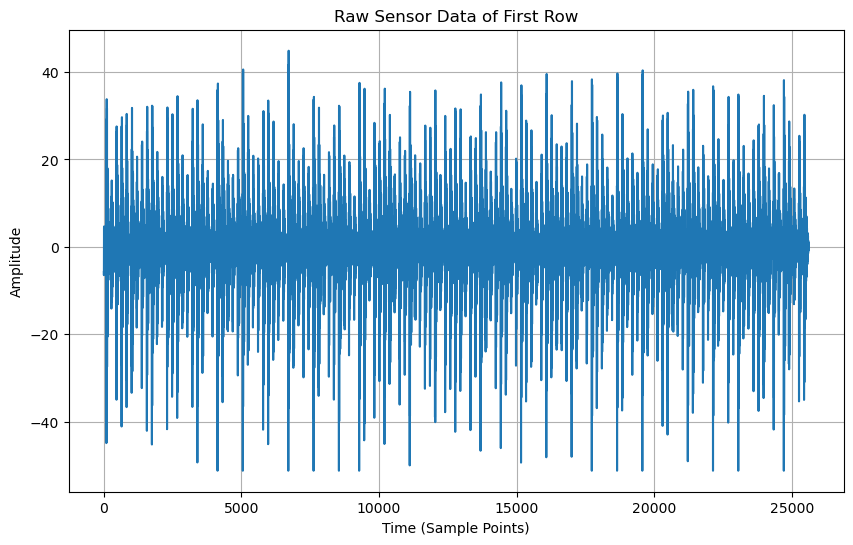

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(row_300)
plt.title('Raw Sensor Data of First Row')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

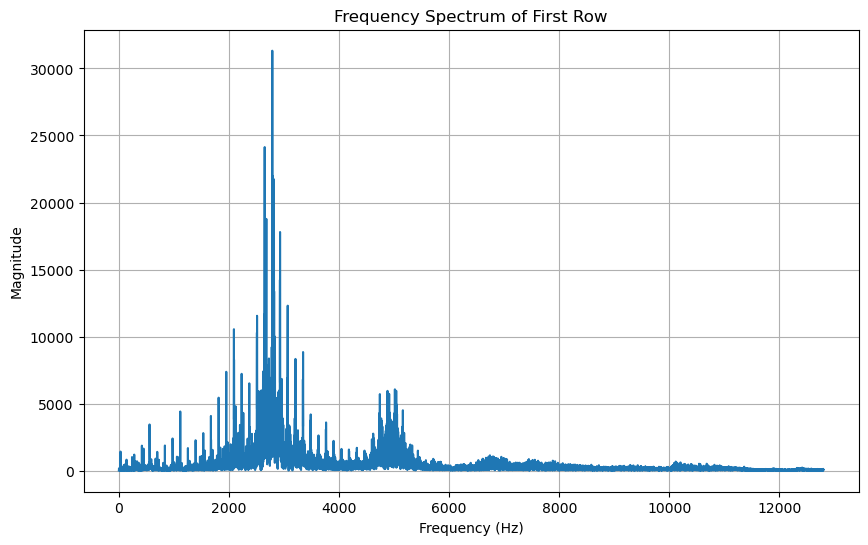

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# FFT 적용
fft_values = np.fft.fft(row_300)
fft_magnitude = np.abs(fft_values)  # FFT 결과의 절댓값을 사용하여 크기 계산
n = len(row_300)
sampling_rate = 25600  # 샘플링 주파수, 필요시 변경
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)  # 주파수 축 생성

# 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n // 2], fft_magnitude[:n // 2])  # 양의 주파수 성분만 시각화
plt.title('Frequency Spectrum of First Row')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


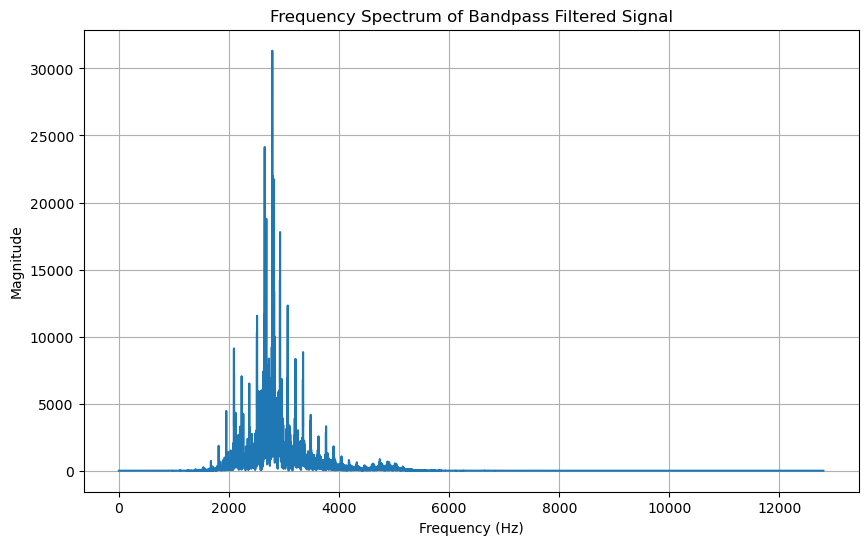

In [79]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 생성 함수
def bandpass_filter(data, lowcut, highcut, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate  # 나이퀴스트 주파수
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # 대역 통과 필터 생성
    y = lfilter(b, a, data)
    return y

# 샘플링 주파수 및 필터 경계 설정
sampling_rate = 25600  # Hz, 필요시 조정
lowcut = 2000  # 저주파 경계 (Hz)
highcut = 4000  # 고주파 경계 (Hz)

# 대역 통과 필터 적용
filtered_signal = bandpass_filter(row_300, lowcut, highcut, sampling_rate)

# 필터링된 신호의 주파수 스펙트럼 계산 (FFT)
fft_filtered = np.fft.fft(filtered_signal)
fft_filtered_magnitude = np.abs(fft_filtered)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sampling_rate)

# 필터링된 주파수 스펙트럼 시각화
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(filtered_signal) // 2], fft_filtered_magnitude[:len(filtered_signal) // 2])
plt.title('Frequency Spectrum of Bandpass Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


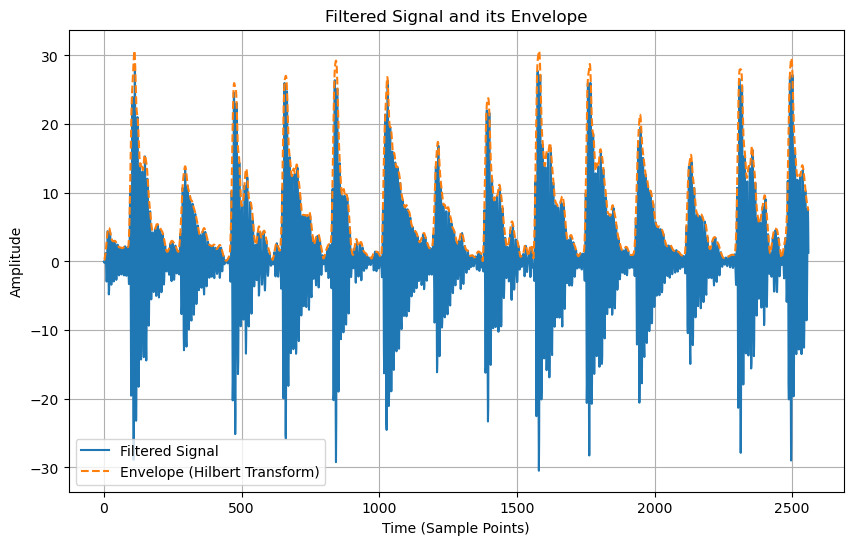

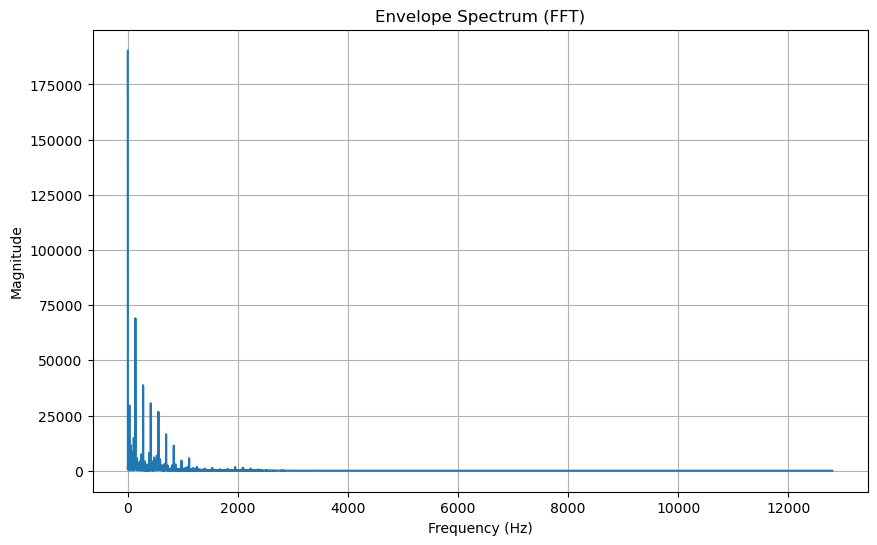

In [80]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_300, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 필터링된 신호와 외곽선 시각화
plt.figure(figsize=(10, 6))
plt.plot(filtered_signal[:len(filtered_signal)//10], label='Filtered Signal')
plt.plot(envelope[:len(filtered_signal)//10], '--', label='Envelope (Hilbert Transform)')
plt.title('Filtered Signal and its Envelope')
plt.xlabel('Time (Sample Points)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# 3. 외곽선 신호의 주파수 스펙트럼 (FFT) 계산 및 시각화
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


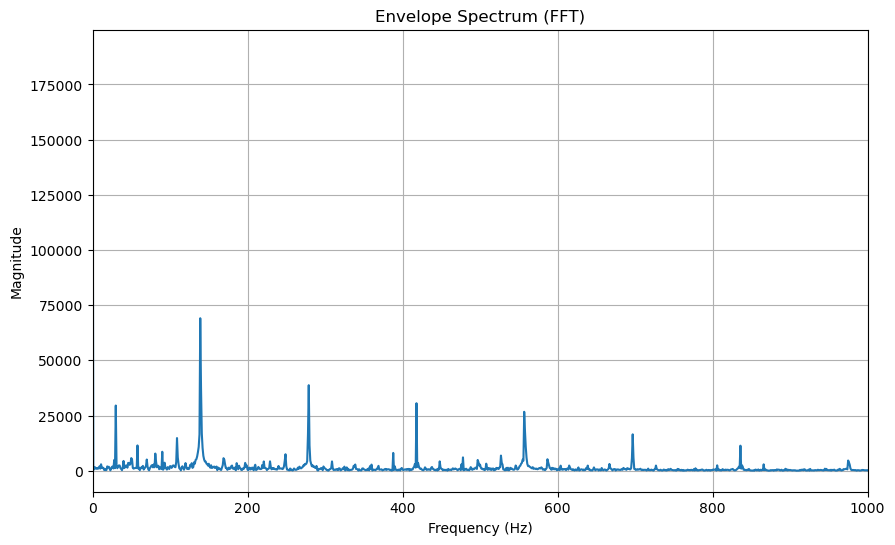

In [81]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_300, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~4000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1000)  # x축 범위 설정
plt.show()


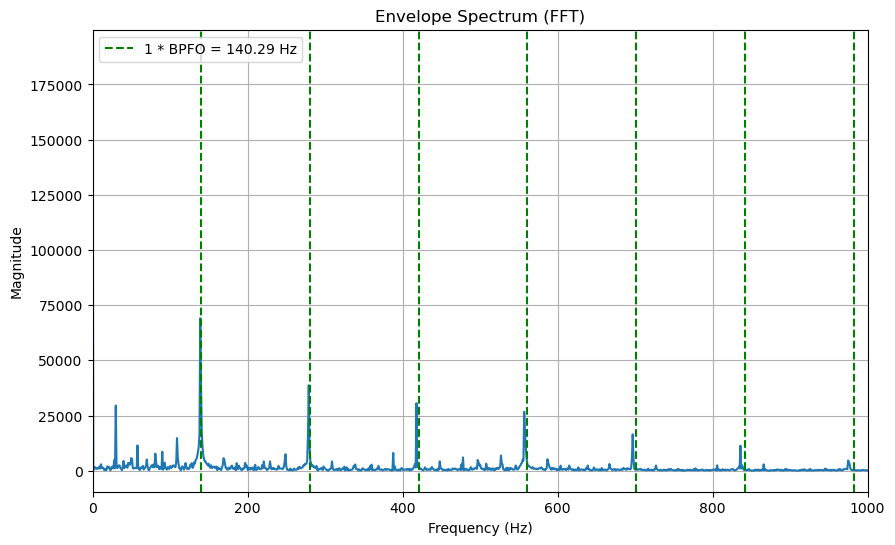

In [104]:
from scipy.signal import hilbert
import numpy as np
import matplotlib.pyplot as plt

# 대역 통과 필터 적용 (이전 코드와 동일)
filtered_signal = bandpass_filter(row_300, lowcut, highcut, sampling_rate)

# 1. 힐버트 변환을 통해 신호의 외곽선 추출
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)  # 힐버트 변환으로 얻은 외곽선

# 2. 외곽선에 대해 FFT 적용
fft_envelope = np.fft.fft(envelope)
fft_envelope_magnitude = np.abs(fft_envelope)  # 외곽선의 FFT 결과
frequencies = np.fft.fftfreq(len(envelope), d=1/sampling_rate)  # 주파수 축 계산

# 3. 외곽선의 주파수 스펙트럼 시각화 (x축 범위 0~1000Hz로 제한)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(envelope)//2], fft_envelope_magnitude[:len(envelope)//2])
plt.title('Envelope Spectrum (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 1000)  # x축 범위 설정

# BPFO와 그 배수에 수직선 그리기
BPFO = 140.29  # BPFO 값
harmonics = 7  # 그릴 배수의 개수 (예: 1x, 2x, ..., 7x)

for i in range(1, harmonics + 1):
    plt.axvline(x=BPFO * i, color='g', linestyle='--', label=f'{i} * BPFO = {BPFO * i:.2f} Hz' if i == 1 else "")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


## 내륜